<a href="https://colab.research.google.com/github/iron59zug/YFapi/blob/master/plot_3MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# plotting three (exponential) moving averages

# libs
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import plotly.graph_objects as go # interactive chart

#data
dsrc = 'yahoo'
dsrca = 'stooq'
stox = 'TSLA'
sdate = '2019-06-30'
edate = str(datetime.date.today())
rown = 2

#calculation
sday=30; lday=252; #EMA
STs=5; MTs=21; LTs=63 #MACD

#layout
fs=28; fsx=36; fsy=9
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.style.use('fivethirtyeight')

In [80]:
# data
df = pdr.DataReader(stox, data_source=dsrc, start=sdate)
"""# alternative: use data from a csv file
from google.colab import files
dfu = files.upload()
df = df.set_index(pd.DatetimeIndex(df['Date']))
""" 
df.rename(columns={'High':'h', 'Low':'l', 'Open':'o', 'Close':'c', 
                   'Volume':'vol', 'Adj Close':'ac'}, inplace=True)
# df = df.tail(rown) # only use last x lines of data
dfs = df.iloc[np.r_[0:2, -2:0]]; dfs # show a small sample

,h,l,o,c,vol,ac
Date,,,,,,
2019-07-01,233.100006,226.279999,230.210007,227.169998,8238000,227.169998
2019-07-02,229.149994,222.220001,228.889999,224.550003,9259000,224.550003
2020-07-27,1547.939941,1413.000000,1435.000000,1539.599976,15988400,1539.599976
2020-07-28,1564.459961,1474.420044,1504.000000,1476.489990,15808700,1476.489990


In [81]:
# pandas_datareader.stooq.StooqDailyReader(symbols=None, start=None, end=None, retry_count=3, pause=0.1, session=None, chunksize=25)
# Returns DataFrame/dict of Dataframes of historical stock prices from symbols, over date range, start to end
# default_start_date = 5 years before current date
f = web.DataReader(stox,dsrca,start=sdate,end=edate)
f[:rown] # example of calling stooq api, data not used in plt

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-28,1504.0,1564.70,1474.4200,1476.49,15770229
2020-07-27,1435.0,1547.94,1413.0003,1539.60,16048669


In [82]:
# plot asset's adjusted close price, if no split or dividend, adj.close==close
"""
plt.figure(figsize=(fsx, fsy))
plt.title(stox, fontsize=fs)
plt.plot(df['ac'], label='adj.close')
plt.legend(loc='lower right', fontsize=fs); #plt.show()
"""
df.drop(['h','l','o'], axis=1, inplace=True)
#df

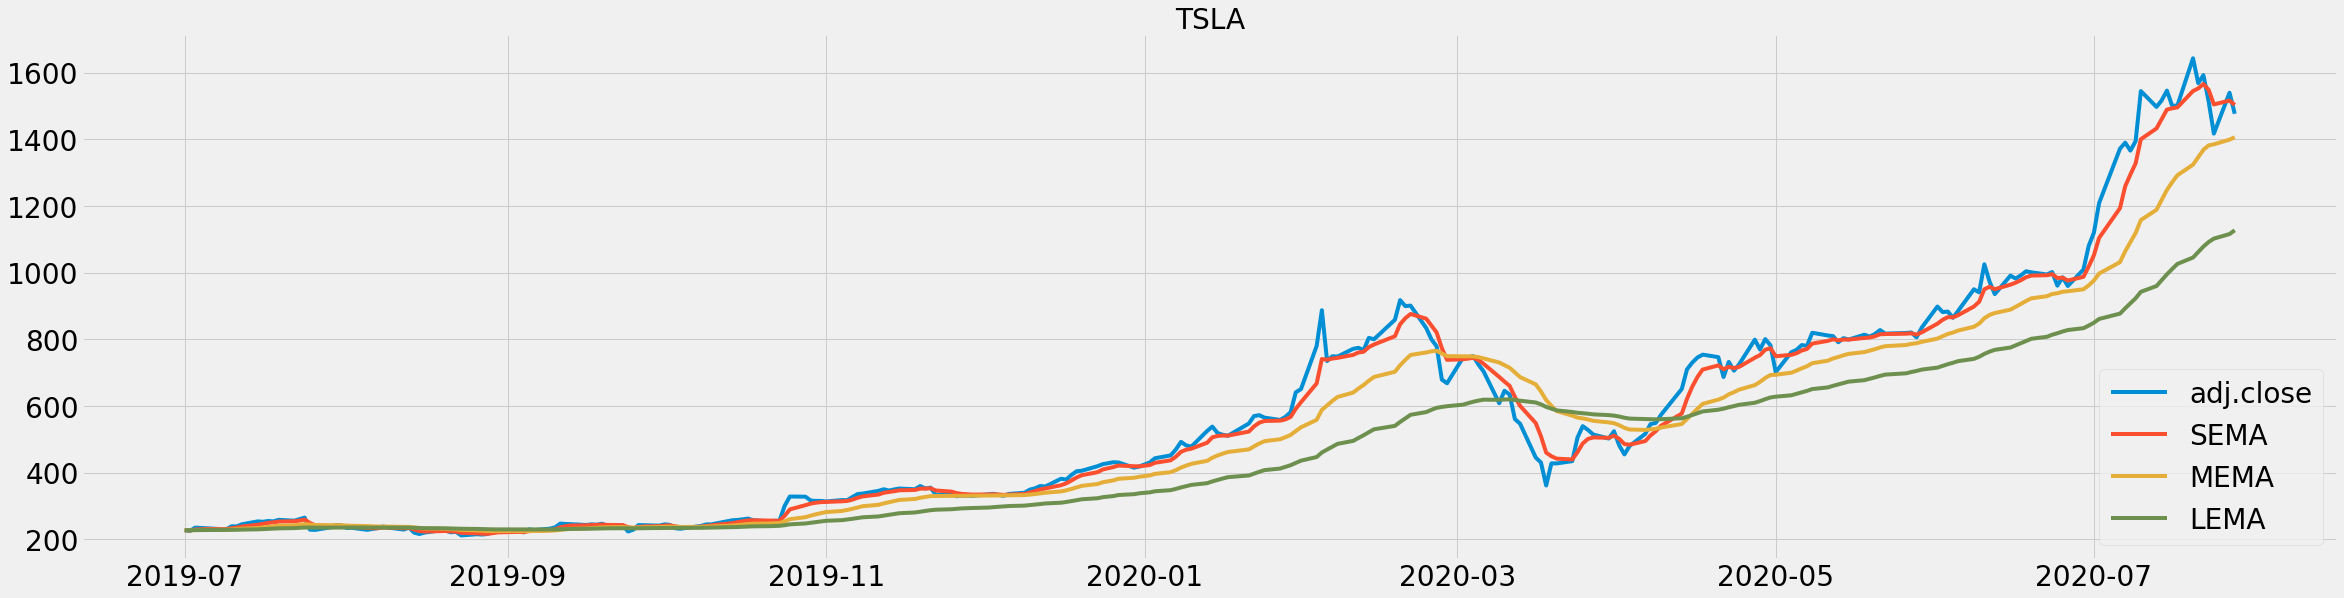

,c,vol,ac,sema,mema,lema
Date,,,,,,
2020-07-22,1592.329956,14161100,1592.329956,1565.832659,1368.461774,1078.191849
2020-07-23,1513.069946,24328500,1513.069946,1548.245088,1381.607971,1091.781789
2020-07-24,1417.000000,19396600,1417.000000,1504.496725,1384.825428,1101.944859
2020-07-27,1539.599976,15988400,1539.599976,1516.197809,1398.895842,1115.621581
2020-07-28,1476.489990,15808700,1476.489990,1502.961869,1405.949855,1126.898719


In [83]:
# calc and plot EMAs
SEMA = df.ac.ewm(span=STs, adjust=False).mean()
MEMA = df.ac.ewm(span=MTs, adjust=False).mean()
LEMA = df.ac.ewm(span=LTs, adjust=False).mean()
df['sema'] = SEMA; df['mema'] = MEMA; df['lema'] = LEMA
plt.figure(figsize=(fsx, fsy))
plt.title(stox, fontsize=fs)
plt.plot(df['ac'], label='adj.close')
plt.plot(SEMA, label='SEMA')
plt.plot(MEMA, label='MEMA')
plt.plot(LEMA, label='LEMA')
plt.legend(loc='lower right', fontsize=fs); plt.show()
df[-5:]

In [84]:
# determine whether Buy Or Sell


,c,vol,ac,sema,mema,lema
Date,,,,,,
2019-07-01,227.169998,8238000,227.169998,227.169998,227.169998,227.169998
2019-07-02,224.550003,9259000,224.550003,226.296666,226.931817,227.088123
2019-07-03,234.899994,14201100,234.899994,229.164442,227.656197,227.332244
2019-07-05,233.100006,7065700,233.100006,230.476297,228.151088,227.512487
2019-07-08,230.339996,5880500,230.339996,230.430863,228.350080,227.600847
...,...,...,...,...,...,...
2020-07-22,1592.329956,14161100,1592.329956,1565.832659,1368.461774,1078.191849
2020-07-23,1513.069946,24328500,1513.069946,1548.245088,1381.607971,1091.781789
2020-07-24,1417.000000,19396600,1417.000000,1504.496725,1384.825428,1101.944859
